### Model Testing Analysis

In [2]:
import os
import pandas as pd

os.listdir("performance_result")[:5]

['LlamaParser_gpt-3.5-turbo-0125_DB Concepts Chapter1.pdf.csv',
 'LlamaParser_gpt-3.5-turbo-0125_DB Concepts Chapter2.pdf.csv',
 'LlamaParser_gpt-3.5-turbo-0125_DB Concepts Chapter3.pdf.csv',
 'LlamaParser_gpt-3.5-turbo_DB Concepts Chapter1.pdf.csv',
 'LlamaParser_gpt-3.5-turbo_DB Concepts Chapter2.pdf.csv']

In [3]:
file_list = os.listdir("examplefiles")
loader_list = ["LlamaParser", "PyPDFLoader", "PyMyPDF4llm"]
llm_list = ["gpt-3.5-turbo", "gpt-3.5-turbo-0125", "gpt-4o", "gpt-4o-2024-11-20", "gpt-4o-mini"]

In [4]:
# example : LlamaParser + gpt-3.5-turbo performance

df_list = []

for filename in file_list:
    PATH = f"performance_result/{loader_list[0]}_{llm_list[0]}_{filename}.csv"
    if os.path.exists(PATH):
        df = pd.read_csv(PATH)
        df_list.append(df)

performance_result = pd.concat(df_list).iloc[:,1:]
performance_result.head()

,user_input,retrieved_contexts,response,reference,answer_relevancy,context_precision,faithfulness,context_recall,answer_correctness
0,What is definition of DBMS?,['# CHAPTER 1\n\n# Introduction\n\nA database-...,A database-management system (DBMS) is a colle...,A database-management system (DBMS) is a colle...,0.877195,1.000000,0.666667,1.0,0.544552
1,Please tell me some representative examples of...,['What are five main functions of a database a...,Some representative examples of database appli...,Database can be used for Enterprise Informatio...,0.971513,0.166667,0.000000,1.0,0.215232
2,What kinds of data storage is used in 1950s?,['- Late 1960s and 1970s: Widespread use of ha...,Magnetic tapes were the primary form of data s...,Magnetic tapes were developed for data storage...,0.944058,0.166667,0.800000,1.0,0.614368
3,Relational model concept is defined by whom? P...,['- Relational Model. The relational model use...,The relational model concept is defined by Edg...,A landmark paper by Codd [1970] defined the re...,0.913699,1.000000,0.000000,0.0,0.521585
4,What is DML and DDL?,['# Chapter 1\n\n# Introduction\n\nIn practice...,"DML stands for Data Manipulation Language, whi...",A data-manipulation language (DML) is a langua...,0.948696,1.000000,0.714286,0.5,0.709428


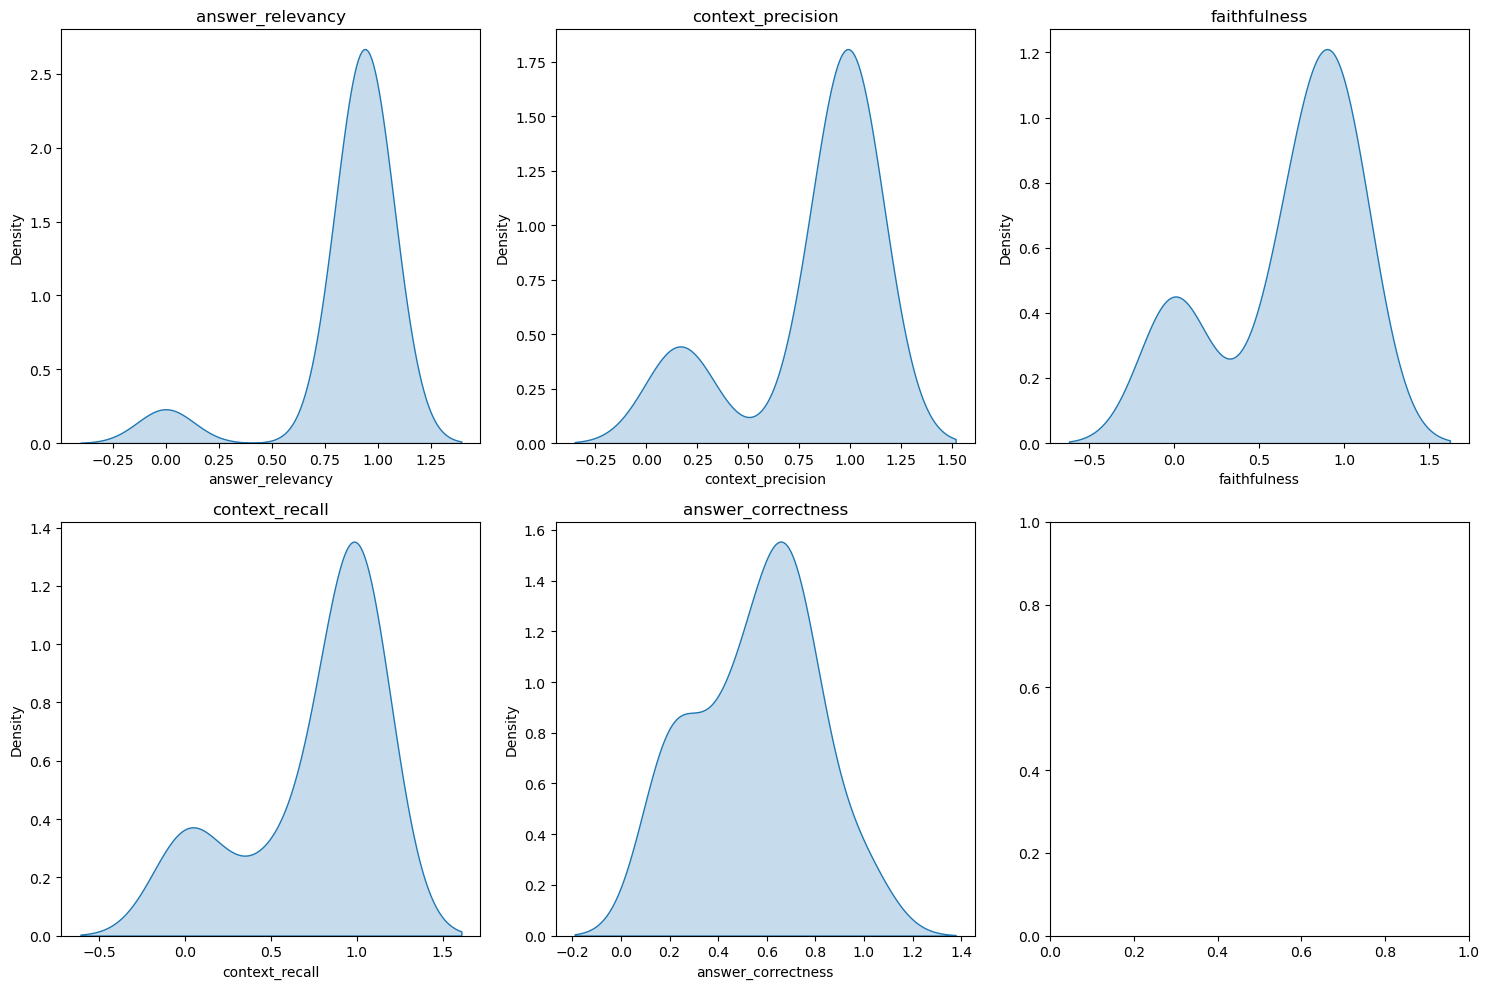

In [5]:
# example : LlamaParser + gpt-3.5-turbo performance VISUALIZATION

import matplotlib.pyplot as plt
import seaborn as sns

figure, ax = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

for row in range(2):
    for col in range(3):
        if (3*row+col) == 5:
            break
        data = performance_result.iloc[:,-5+(3*row+col)]
        sns.kdeplot(data=data, fill=True, ax=ax[row, col])
        ax[row,col].set(title=performance_result.columns[-5+(3*row+col)])

plt.tight_layout()
plt.show()

### Statistics Comparison : Loaders

In [6]:
loaders_performance_dict = {"LlamaParser" : None, "PyPDFLoader" : None, "PyMyPDF4llm" : None}

for loader in loader_list:
    df_list = [] # loader+file 조합의 결과 list. element는 pd.DataFrame
    for llm in llm_list:
        for file in file_list:
            PATH = f"performance_result/{loader}_{llm}_{filename}.csv"
            if os.path.exists(PATH):
                df = pd.read_csv(PATH)
                df_list.append(df)
    loaders_performance_dict[loader] = pd.concat(df_list).iloc[:,1:]

C:\Users\USER\AppData\Local\Temp\ipykernel_40356\4103361494.py:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=data, fill=True, ax=ax[row, col], label=loader)


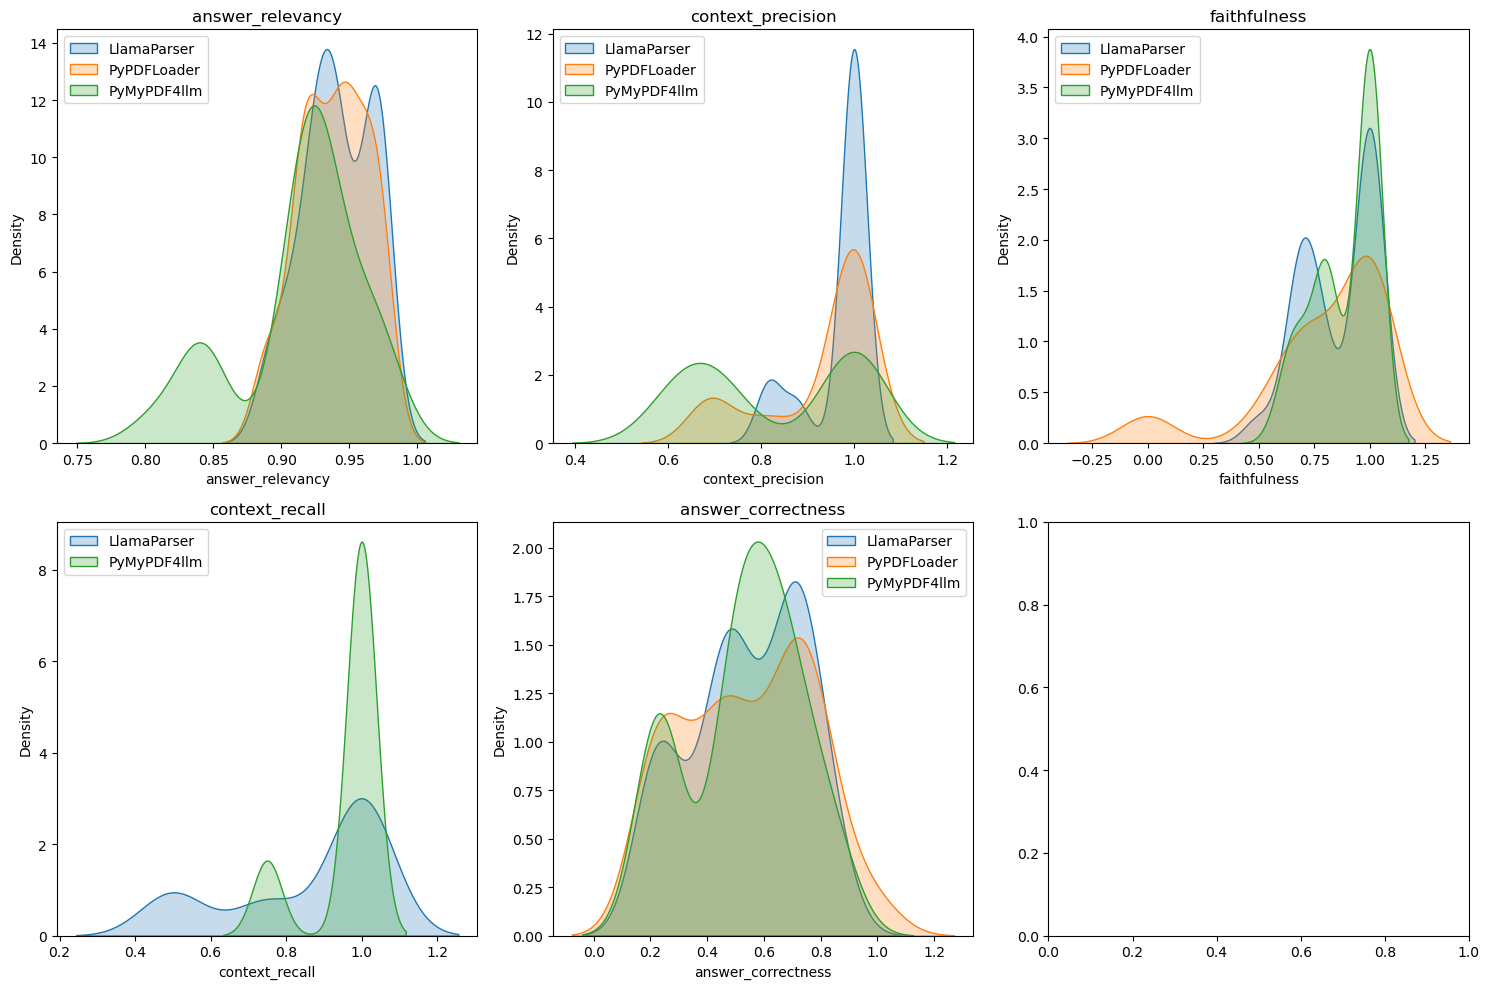

In [9]:
figure, ax = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

for row in range(2):
    for col in range(3):
        if (3*row+col) == 5:
            break
        for loader in loader_list:
            data = loaders_performance_dict[loader].iloc[:,-5+(3*row+col)]
            sns.kdeplot(data=data, fill=True, ax=ax[row, col], label=loader)
            ax[row,col].set(title=performance_result.columns[-5+(3*row+col)])
            ax[row,col].legend()

plt.tight_layout()
plt.show()

### Statistics Comparison : LLMs

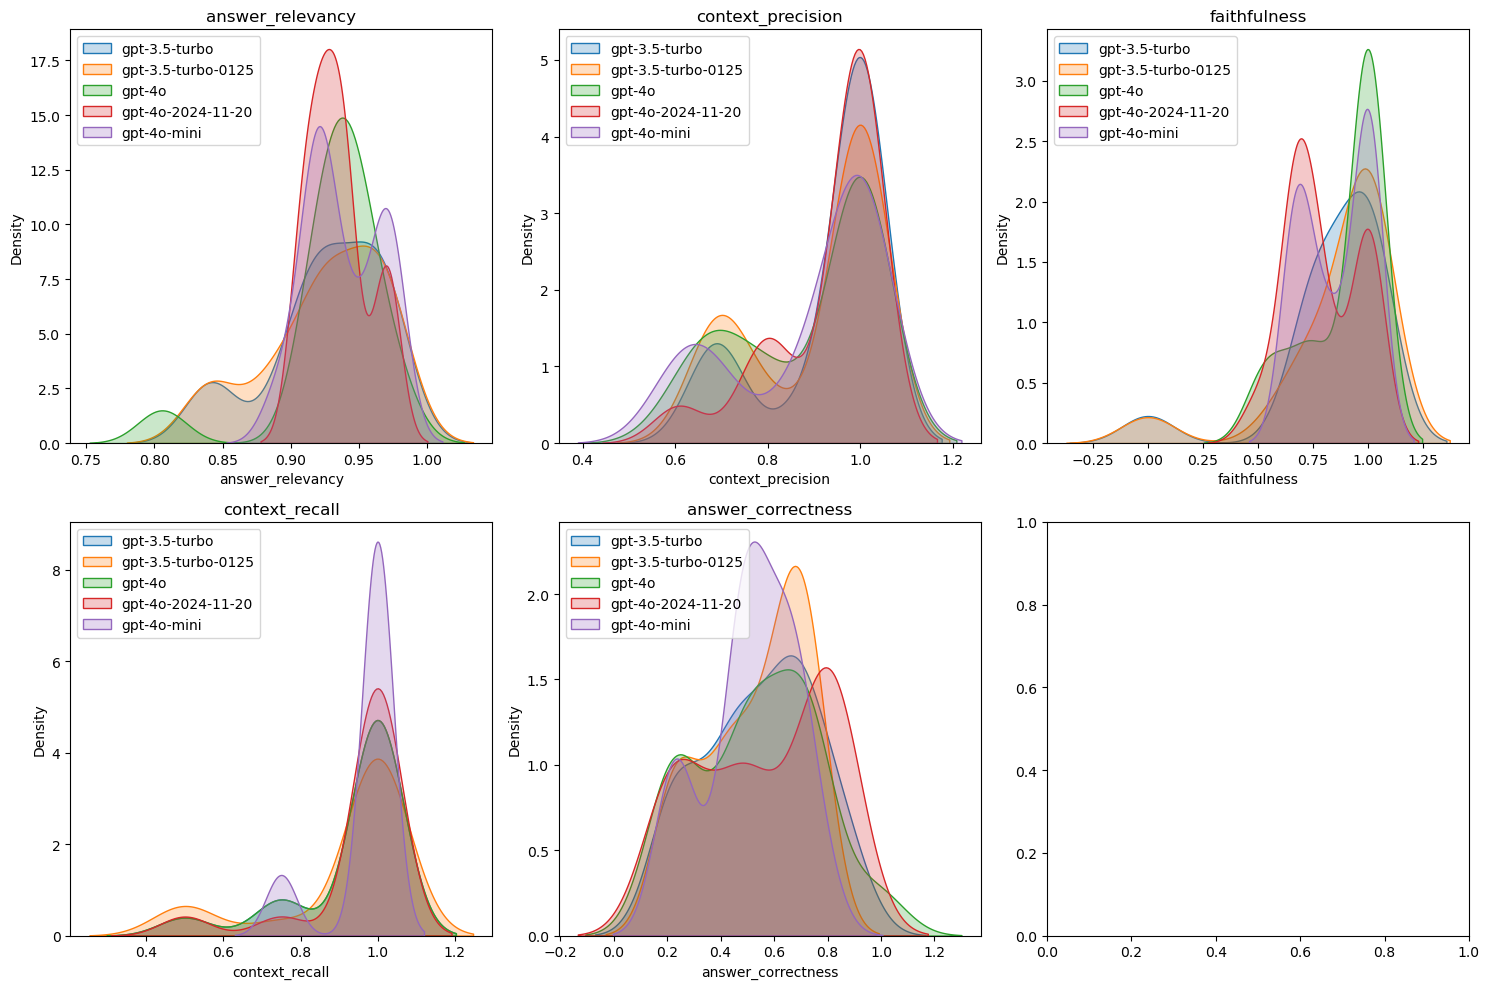

In [10]:
llm_performance_dict = {"gpt-3.5-turbo" : None, "gpt-3.5-turbo-0125" : None, 
                        "gpt-4o" : None, "gpt-4o-2024-11-20" : None, "gpt-4o-mini" : None}

for llm in llm_list:
    df_list = [] # loader+file 조합의 결과 list. element는 pd.DataFrame
    for loader in loader_list:
        for file in file_list:
            PATH = f"performance_result/{loader}_{llm}_{filename}.csv"
            if os.path.exists(PATH):
                df = pd.read_csv(PATH)
                df_list.append(df)
    llm_performance_dict[llm] = pd.concat(df_list).iloc[:,1:]


figure, ax = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

for row in range(2):
    for col in range(3):
        if (3*row+col) == 5:
            break
        for llm in llm_list:
            data = llm_performance_dict[llm].iloc[:,-5+(3*row+col)]
            sns.kdeplot(data=data, fill=True, ax=ax[row, col], label=llm)
            ax[row,col].set(title=performance_result.columns[-5+(3*row+col)])
            ax[row,col].legend()

plt.tight_layout()
plt.show()